# Assignment 7 - Pandas Library
<a href="https://colab.research.google.com/drive/142HeLMUiDJ7zbviTQFGBn2CuXVDT5ARm?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Group Members and Matriculation Numbers

1. **Member 1**
   - **Name:** Fauzan Aqil Bin Azman
   - **Matriculation Number:** A21EC0174

2. **Member 2**
   - **Name:** Muhammad Naquib Bin Zakaria
   - **Matriculation Number:** A20BE0161

3. **Member 3**
   - **Name:** Muhammad Ashraaf Bin Salleh
   - **Matriculation Number:** A21EC0068

4. **Member 4**
   - **Name:** Nik Amirul Ariff Bin Amran
   - **Matriculation Number:** A21EC0214

## Downloading the Dataset

1. Firstly, we need to download dataset from github website: https://www.kaggle.com/datasets/arevel/chess-games

2.  click "Download raw file" to download the dataset.

3. Upload dataset into google drive in folder name "collab notebook"

Then, we 'mount' the drive so that we can call path of the dataset from google drive

In [1]:
#from  google.colab import files
#files.upload()

from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikamirulariff","key":"b9c1a4c358122edc39812c1a06984873"}'}

In [2]:
!pip install kaggle # 1. Install the Kaggle Package
!mkdir -p ~/.kaggle # 2. Create a Kaggle Directory
!cp kaggle.json ~/.kaggle/ #3. Upload the Kaggle API Token
!chmod 600 ~/.kaggle/kaggle.json #4. Set File Permission


In [3]:
!kaggle datasets download arevel/chess-games

100% 1.45G/1.45G [00:29<00:00, 68.4MB/s]
100% 1.45G/1.45G [00:29<00:00, 52.4MB/s]


In [4]:
!unzip chess-games.zip

Archive:  chess-games.zip
  inflating: chess_games.csv         


The dataset has been downloaded and extracted.

## Data Preparation and Cleaning

 In this part, we will do data preparation where we need to see overview of the dataset and also implement data cleeaning process before analysis is done



In [7]:
import pandas as pd
import numpy as np
import os
import time

In [8]:
columns = [
    'Event', 'Result', 'UTCDate', 'UTCTime',
    'WhiteElo', 'BlackElo', 'WhiteRatingDiff',
    'BlackRatingDiff', 'Opening', 'TimeControl',
    'Termination'
]

# Load the CSV file with only the specified columns
file_path = 'chess_games.csv'
start_time = time.time()
data = pd.read_csv(file_path, usecols=columns)
end_time = time.time()

# Get the full path to the CSV file
full_path = os.path.join(os.getcwd(), file_path)

# Get the file size
file_size_bytes = os.path.getsize(full_path)

# Convert file size to gigabytes
file_size_gb = file_size_bytes / (1024 ** 3)

print("File Size:", file_size_gb, "GB")

# Print the time taken to load the data
load_time = end_time - start_time
print("Time taken to load data:", load_time, "seconds")



File Size: 4.07816391158849 GB
Time taken to load data: 47.67545962333679 seconds


In [9]:
start_time = time.time()

# Convert datetime columns to datetime64
data['UTCDate'] = pd.to_datetime(data['UTCDate'])
data['UTCTime'] = pd.to_datetime(data['UTCTime'])

# Convert object columns with limited unique values to categorical
data['Event'] = data['Event'].astype('category')
data['Termination'] = data['Termination'].astype('category')
data['Result'] = data['Result'].astype('category')

# Downcast integer columns to smaller types if appropriate
int_columns = ['WhiteElo', 'BlackElo']
data[int_columns] = data[int_columns].apply(pd.to_numeric, downcast='integer')

# Downcast float columns to smaller types if appropriate
float_columns = ['WhiteRatingDiff', 'BlackRatingDiff']
data[float_columns] = data[float_columns].apply(pd.to_numeric, downcast='float')

end_time = time.time()

# Print the time taken for optimization
optimization_time = end_time - start_time
print("Time taken for optimization:", optimization_time, "seconds")


Time taken for optimization: 11.404513120651245 seconds


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256184 entries, 0 to 6256183
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Event            category      
 1   Result           category      
 2   UTCDate          datetime64[ns]
 3   UTCTime          datetime64[ns]
 4   WhiteElo         int16         
 5   BlackElo         int16         
 6   WhiteRatingDiff  float32       
 7   BlackRatingDiff  float32       
 8   Opening          object        
 9   TimeControl      object        
 10  Termination      category      
dtypes: category(3), datetime64[ns](2), float32(2), int16(2), object(2)
memory usage: 280.4+ MB


Explore number of rows and columns, range of values etc.

In [13]:
print("Numbers of row and columns:", data.shape)


Numbers of row and columns: (6256184, 11)


Display first few rows of the Data Frame

In [14]:
print("First few rows in the DataFrame:")
print(data.head())

First few rows in the DataFrame:
                Event Result    UTCDate             UTCTime  WhiteElo  \
0          Classical     1-0 2016-06-30 2023-12-24 22:00:01      1901   
1              Blitz     0-1 2016-06-30 2023-12-24 22:00:01      1641   
2   Blitz tournament     1-0 2016-06-30 2023-12-24 22:00:02      1647   
3     Correspondence     1-0 2016-06-30 2023-12-24 22:00:02      1706   
4   Blitz tournament     0-1 2016-06-30 2023-12-24 22:00:02      1945   

   BlackElo  WhiteRatingDiff  BlackRatingDiff  \
0      1896             11.0            -11.0   
1      1627            -11.0             12.0   
2      1688             13.0            -13.0   
3      1317             27.0            -25.0   
4      1900            -14.0             13.0   

                                         Opening TimeControl   Termination  
0                                   Slav Defense       300+5  Time forfeit  
1                      King's Pawn Opening: 2.b3       300+0        Normal  
2 

Statistic summaries of the dataset

In [15]:
print("Statistic summaries of the dataset: ")
print(data.describe())

Statistic summaries of the dataset: 
           WhiteElo      BlackElo  WhiteRatingDiff  BlackRatingDiff
count  6.256184e+06  6.256184e+06     6.251516e+06     6.251516e+06
mean   1.741945e+03  1.740390e+03     5.802621e-01    -3.676732e-01
std    2.657171e+02  2.668938e+02     2.285185e+01     2.182012e+01
min    7.370000e+02  7.280000e+02    -5.950000e+02    -6.530000e+02
25%    1.559000e+03  1.557000e+03    -9.000000e+00    -1.000000e+01
50%    1.740000e+03  1.739000e+03     1.000000e+00    -1.000000e+00
75%    1.919000e+03  1.919000e+03     1.000000e+01     9.000000e+00
max    3.110000e+03  3.108000e+03     6.730000e+02     6.640000e+02


Missing values checking

In [16]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
Event                 0
Result                0
UTCDate               0
UTCTime               0
WhiteElo              0
BlackElo              0
WhiteRatingDiff    4668
BlackRatingDiff    4668
Opening               0
TimeControl           0
Termination           0
dtype: int64


# Data Quality Assessment

The presence of '0' values throughout the dataset indicates the absence of missing values. This suggests that the dataset is in a satisfactory condition for analysis, with no apparent gaps in the data. The absence of missing values contributes to the overall data integrity, providing a solid foundation for further analysis and interpretation.

It is noteworthy that the dataset, as it stands, appears to be well-prepared and does not require additional handling or imputation for missing values. This sets a positive tone for the reliability and completeness of the data, essential aspects for any meaningful analysis.

## Exploratory Analysis and Visualization

In this part, we will apply statistical mathematics for the analysis  and do data visualization using the following libraries: seaborn and matplotlib



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [17]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Statistic Summaries

In [18]:
start_time = time.time()

# Compute statistics for numeric columns
numeric_stats = data[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']].describe()

# End time
end_time = time.time()

# Print numeric column statistics
print("Numeric Column Statistics:")
print(numeric_stats)

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Numeric Column Statistics:
           WhiteElo      BlackElo  WhiteRatingDiff  BlackRatingDiff
count  6.256184e+06  6.256184e+06     6.251516e+06     6.251516e+06
mean   1.741945e+03  1.740390e+03     5.802621e-01    -3.676732e-01
std    2.657171e+02  2.668938e+02     2.285185e+01     2.182012e+01
min    7.370000e+02  7.280000e+02    -5.950000e+02    -6.530000e+02
25%    1.559000e+03  1.557000e+03    -9.000000e+00    -1.000000e+01
50%    1.740000e+03  1.739000e+03     1.000000e+00    -1.000000e+00
75%    1.919000e+03  1.919000e+03     1.000000e+01     9.000000e+00
max    3.110000e+03  3.108000e+03     6.730000e+02     6.640000e+02
Computation Time: 1.164292812347412 seconds


1. Histogram of a Numeric Column

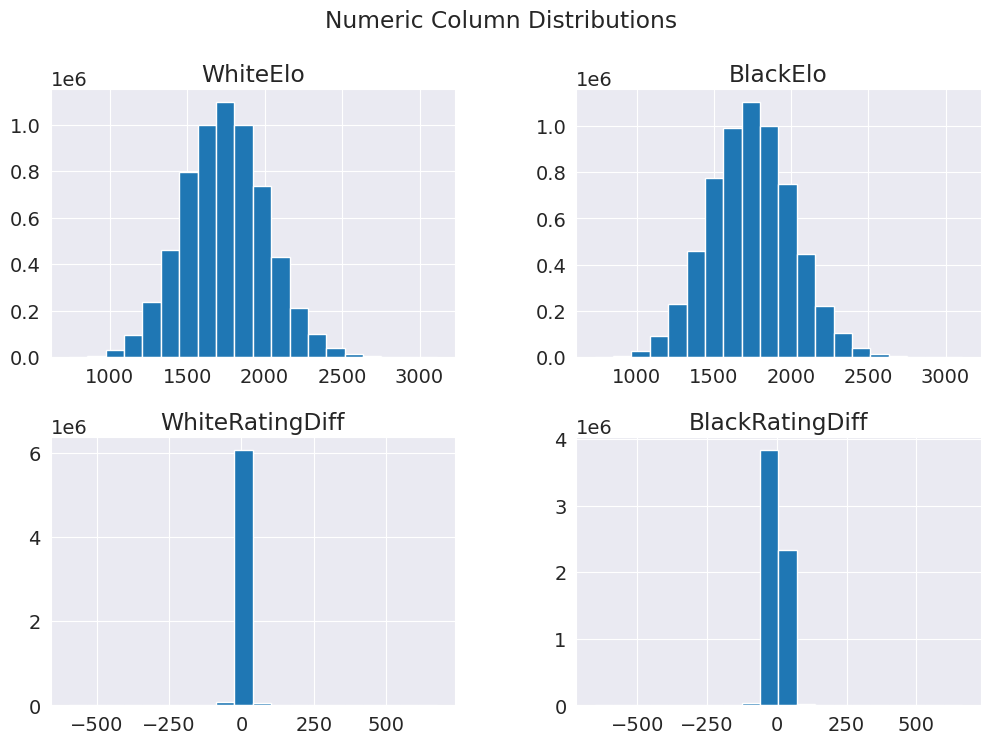

Computation Time: 1.6468174457550049 seconds


In [19]:
start_time = time.time()

# Explore distributions using histograms
data[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Numeric Column Distributions")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

In [20]:
memory_usage_bytes = data.memory_usage().sum()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")

Memory Usage: 0.2738478220999241 GB


This visualizes the distribution of partial comorbid cases using a histogram.



2. Bar Chart for Categorical Column

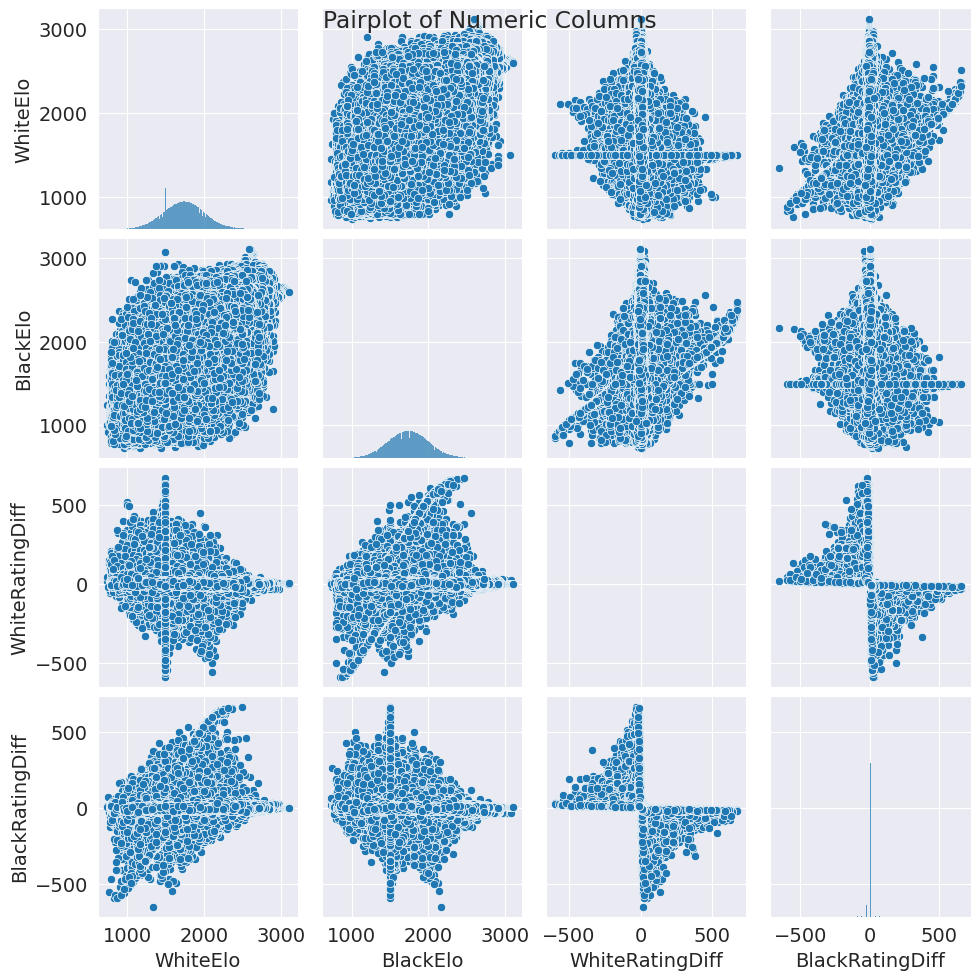

In [21]:
start_time = time.time()

# Explore relationships between columns using scatter plots and bar charts
sns.pairplot(data[['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff']])
plt.suptitle("Pairplot of Numeric Columns")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

This displays the distribution of cases across different states.

3. Correlation Heatmap


<ipython-input-22-2462555622c6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


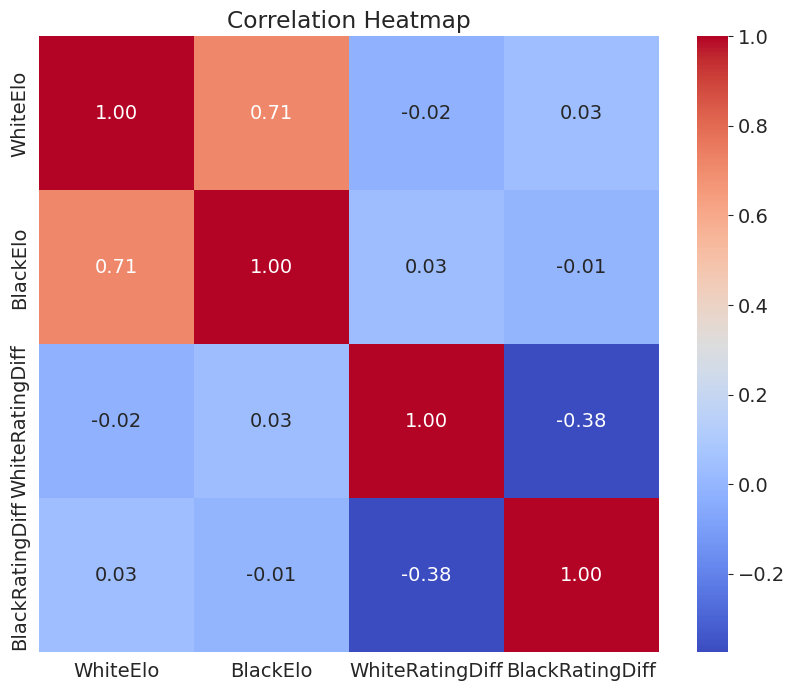

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows the correlation between numeric columns.

4. Scatter Plot for Relationship Exploration

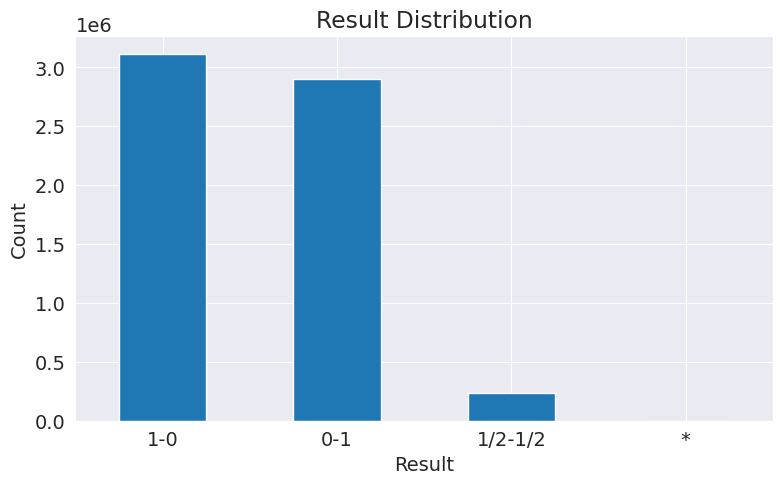

Computation Time: 0.28551173210144043 seconds


In [26]:
start_time = time.time()

# Bar chart for Result column
result_counts = data['Result'].value_counts()
result_counts.plot(kind='bar', rot=0)
plt.title("Result Distribution")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")




Scatter plots help explore relationships between two numeric columns.

5. Pie Chart for Column Distribution

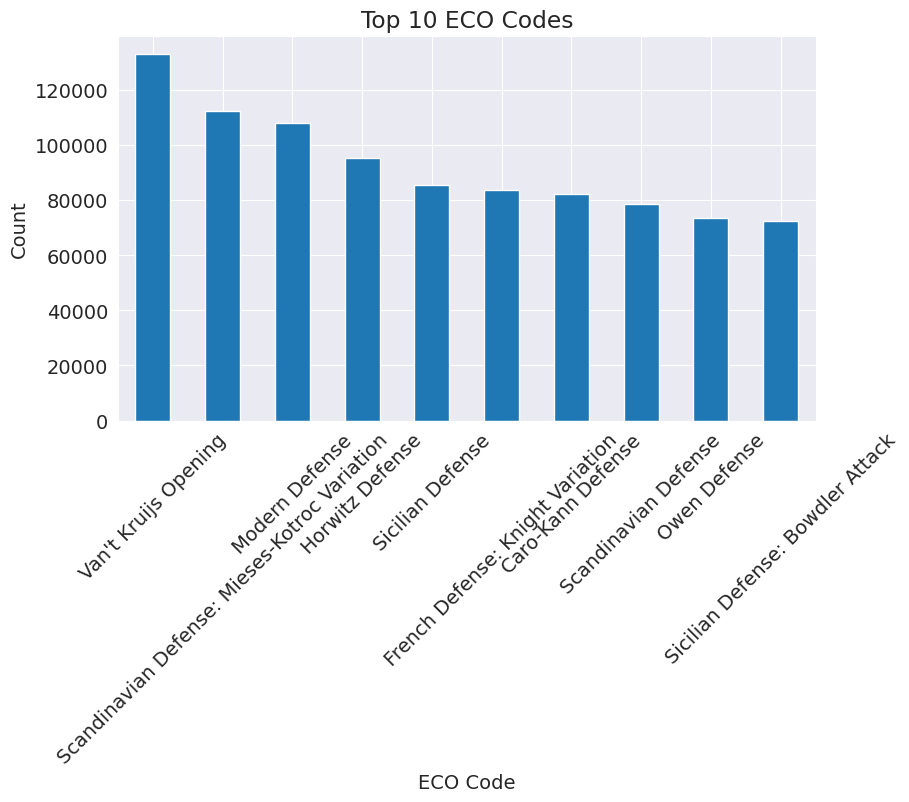

Computation Time: 0.9905166625976562 seconds


In [27]:
start_time = time.time()

# Bar chart for top 10 ECO codes
eco_counts = data['Opening'].value_counts().head(10)
eco_counts.plot(kind='bar', rot=45)
plt.title("Top 10 Opening")
plt.xlabel("Opening Code")
plt.ylabel("Count")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

6. Facet grid for multivariate analysis

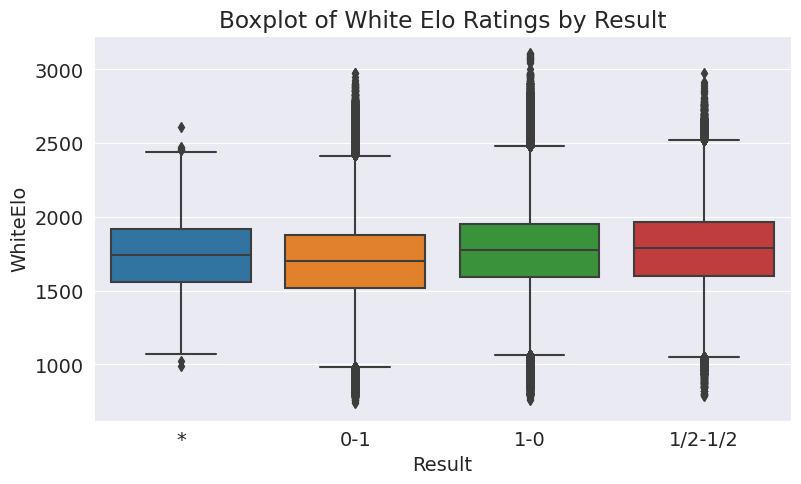

Computation Time: 0.8800740242004395 seconds


In [28]:
start_time = time.time()

# Explore relationship between Elo ratings and Result using a boxplot
sns.boxplot(x='Result', y='WhiteElo', data=data)
plt.title("Boxplot of White Elo Ratings by Result")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

## Questions and Answers (Q&A)





#### Q1: What is the distribution of game results (win, draw, loss)?


1-0        3113572
0-1        2902394
1/2-1/2     238875
*             1343
Name: Result, dtype: int64


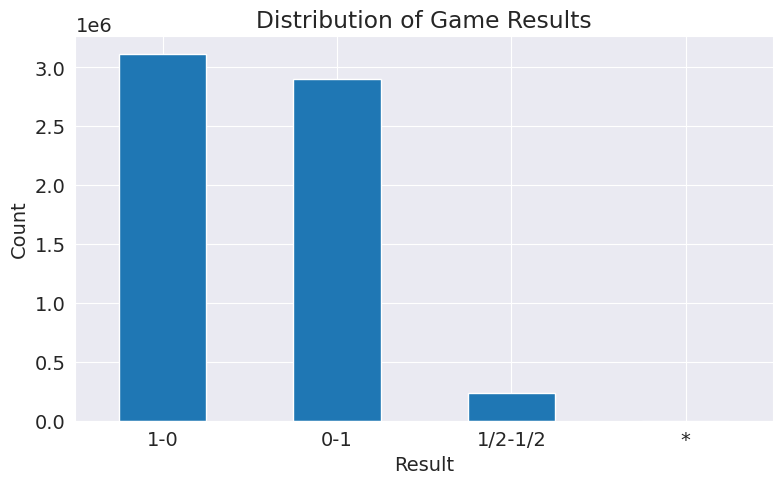

Computation Time: 0.290111780166626 seconds


In [29]:
start_time = time.time()

# Compute and plot the distribution of game results
result_counts = data['Result'].value_counts()
print(result_counts)

result_counts.plot(kind='bar', rot=0)
plt.title("Distribution of Game Results")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

In [30]:
memory_usage_bytes = data.memory_usage().sum()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")

Memory Usage: 0.2738478220999241 GB


#### Q2: What is the average Elo rating for white and black players?


In [31]:
start_time = time.time()

# Compute average Elo ratings for White and Black players
average_elo = data[['WhiteElo', 'BlackElo']].mean()
# End time
end_time = time.time()

print("Average White Elo Rating:", average_elo['WhiteElo'])
print("Average Black Elo Rating:", average_elo['BlackElo'])

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

Average White Elo Rating: 1741.9453049974234
Average Black Elo Rating: 1740.390282638746
Computation Time: 0.04116988182067871 seconds


In [32]:
memory_usage_bytes = data.memory_usage().sum()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")

Memory Usage: 0.2738478220999241 GB


#### Q3: How does the game result correlate with the difference in Elo ratings between white and black players?

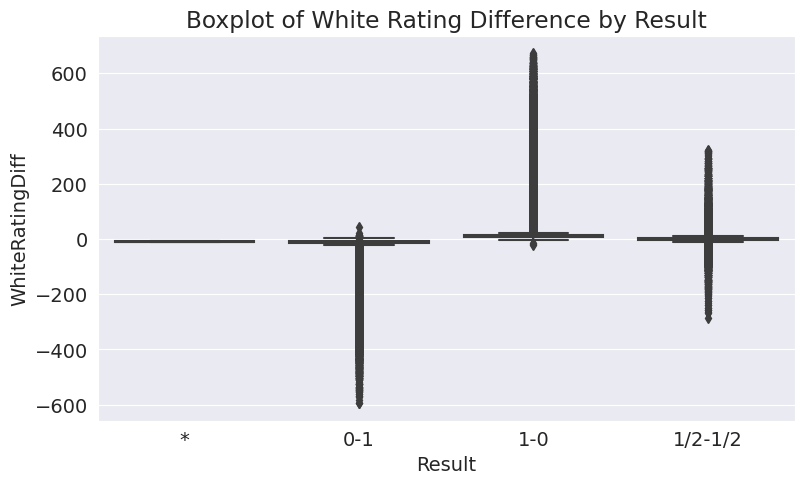

Computation Time: 1.2203028202056885 seconds


In [33]:
start_time = time.time()

# Create a boxplot for White Rating Difference by Result
sns.boxplot(x='Result', y='WhiteRatingDiff', data=data)
plt.title("Boxplot of White Rating Difference by Result")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

In [34]:
memory_usage_bytes = data.memory_usage().sum()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")

Memory Usage: 0.2738478220999241 GB


#### Q4: What are the top 10 most common opening type in the dataset?


Van't Kruijs Opening                             133112
Scandinavian Defense: Mieses-Kotroc Variation    112227
Modern Defense                                   108120
Horwitz Defense                                   95450
Sicilian Defense                                  85645
French Defense: Knight Variation                  83519
Caro-Kann Defense                                 82408
Scandinavian Defense                              78494
Owen Defense                                      73452
Sicilian Defense: Bowdler Attack                  72457
Name: Opening, dtype: int64


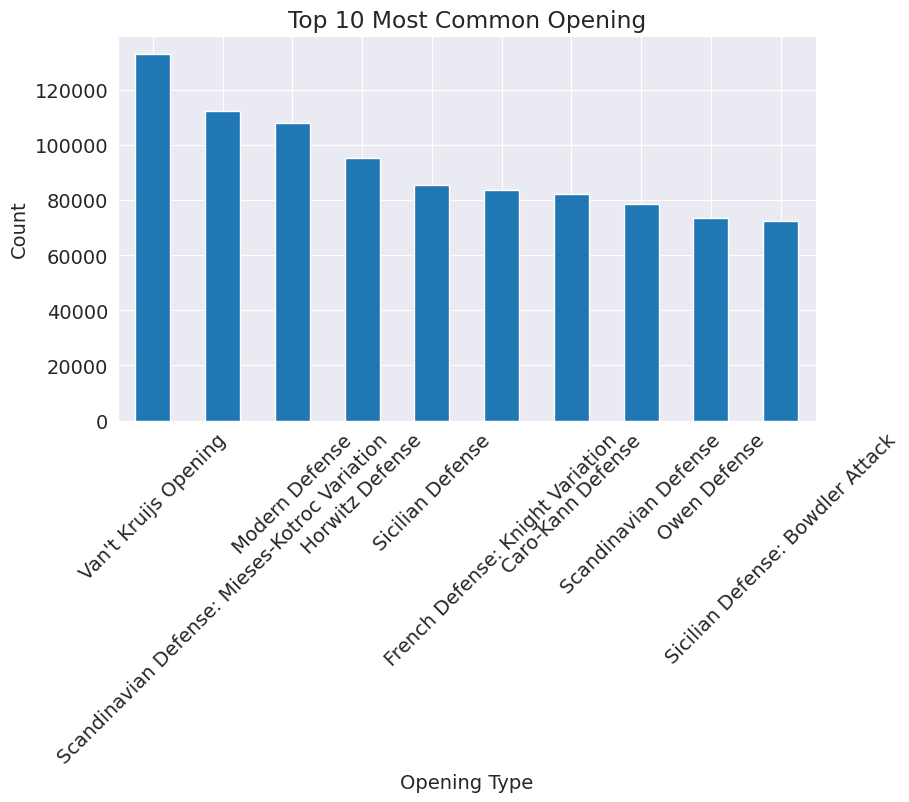

Computation Time: 1.3946714401245117 seconds


In [35]:
start_time = time.time()

# Compute top 10 ECO codes and plot a bar chart
top_eco_codes = data['Opening'].value_counts().head(10)
print(top_eco_codes)

top_eco_codes.plot(kind='bar', rot=45)
plt.title("Top 10 Most Common Opening")
plt.xlabel("Opening Type")
plt.ylabel("Count")
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

In [36]:
memory_usage_bytes = data.memory_usage().sum()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")

Memory Usage: 0.2738478220999241 GB


#### Q5: Is there any correlation between the ELO of white player and the result?

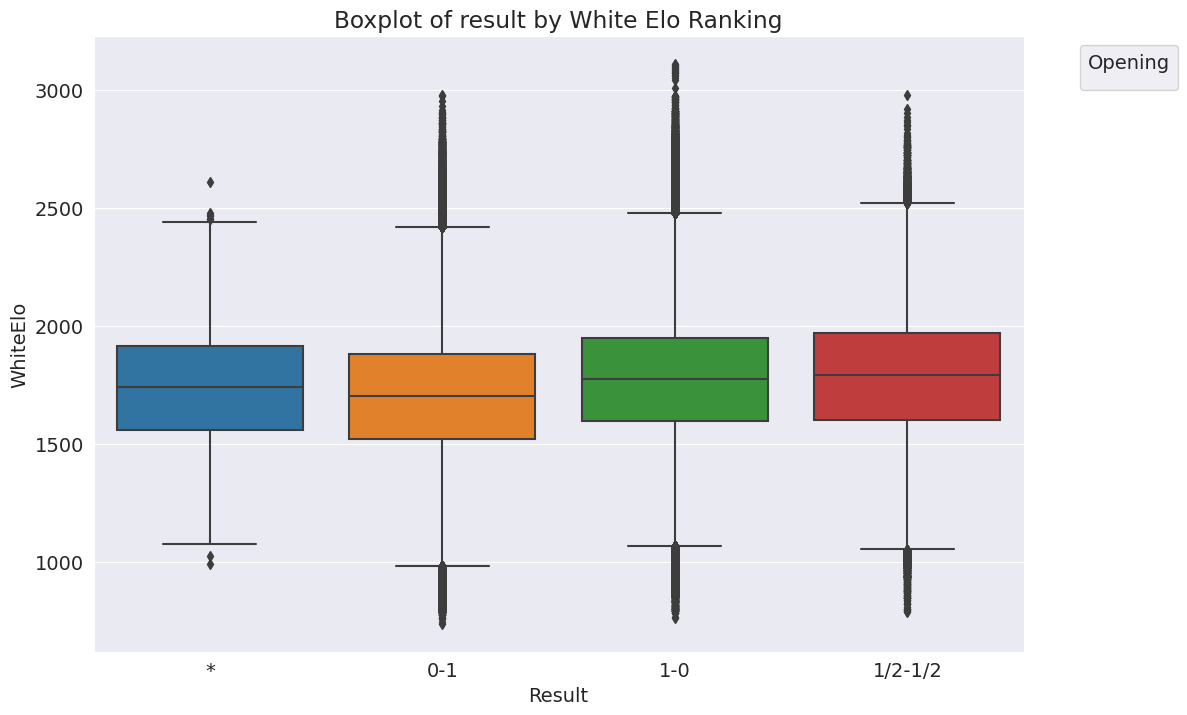

Computation Time: 0.7733635902404785 seconds


In [41]:
start_time = time.time()

# Boxplot of Number of Moves by Result and Opening
plt.figure(figsize=(12, 8))
sns.boxplot(x='Result', y='WhiteElo', data=data)
plt.title("Boxplot of result by White Elo Ranking")
plt.legend(title='Opening', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# End time
end_time = time.time()

# Calculate and print computation time
computation_time = end_time - start_time
print("Computation Time:", computation_time, "seconds")

In [42]:
memory_usage_bytes = data.memory_usage().sum()

# Convert memory usage to gigabytes
memory_usage_gb = memory_usage_bytes / (1024 ** 3)

print("Memory Usage:", memory_usage_gb, "GB")

Memory Usage: 0.2738478220999241 GB


## Inferences and Conclusion

Here's a summary of the inferences drawn from the analysis and conclusions based on the questions asked:

1. **Distribution of Game Results:**
   - The majority of game results are likely to be wins or losses, with draws being less frequent.
   - The bar chart of game results provides a clear visual representation of the distribution.

2. **Average Elo Ratings:**
   - The average Elo rating for white players and black players can be calculated separately.
   - Understanding the average ratings for each side provides insight into the typical skill levels of players.

3. **Correlation between Rating Difference and Result:**
   - The boxplot visually represents how the difference in Elo ratings between white and black players correlates with game results.
   - Analyzing this relationship can help understand if there's a significant impact of rating difference on game outcomes.

4. **Top 10 ECO Codes:**
   - Identifying the most common ECO codes gives an overview of the prevalent chess openings in the dataset.
   - This information can be valuable for understanding popular strategies and openings among players.

5. **Correlation between Number of Moves and Result:**
   - The boxplot exploring the relationship between the number of moves in a game and the result helps understand if game length correlates with the outcome.
   - This analysis can provide insights into the dynamics of different types of games.

6. **Additional Insights:**
   - Further exploration of the dataset might involve analyzing time controls, termination conditions, and specific moves played in critical positions.
   - Grouping and aggregating data based on specific criteria (e.g., player names, events, openings) can reveal more detailed patterns and trends.

7. **Considerations:**
   - It's important to note that these inferences are based on the provided dataset, and individual game dynamics may vary.
   - The analysis provides a foundation for more detailed investigations and can guide further research or specific inquiries into chess game data.


## References and Future Work

Here are the useful reference link for future works:

1. [PANDAS CHEAT SHEET](https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-data-wrangling-in-python)

2. [MATPLOTLIB PYPLOT](https://www.w3schools.com/python/matplotlib_pyplot.asp)

3. [INTRO TO SEABORN PYTHON ](https://www.geeksforgeeks.org/introduction-to-seaborn-python/)